# FNO - Barcelona - Temp-Rain-Dates-15min-150-false-shifted-20

In [1]:
import os
#Plot imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score 
import seaborn as sns

In [2]:
from FNO import FNO

In [3]:
# To show the logs
import logging
logging.getLogger().addHandler(logging.StreamHandler())

In [4]:
input_names = ['E', 'Temp', 'Rain'] + [f"DiaSemana_{n}" for n in range(0, 7)] + [f"Mes_{n}" for n in range(1, 13)] + [f'Hora_{n}' for n in range(0, 24)]

In [5]:
output_names = ['E_shifted']

In [6]:
# Create a dict with the chanels as values and name variables as keys
inputs = {}
for input_name in input_names:
    inputs[input_name] = 1
    
outputs = {}
for output_name in output_names:
    outputs[output_name] = 1

In [7]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /home/jovyan/nas/adorado/green/green/fl/DLSM/FNO


In [8]:
#Config file for the model
config_path = ("./experiments/confs/")
config_name ="conf.yaml"

In [9]:
#Datasets
inputs = inputs
outputs = outputs

In [10]:
main_path = '../data/bcn-temp-rain-weekday-month-hour-15min-300-false-shifted-20/'
train_path = main_path + 'muvacas_pred_target5step_train.hdf5'
test_path = main_path + 'muvacas_pred_target5step_test.hdf5'
statistics_path = main_path + 'statistics_pt5step_train.csv'

In [11]:
mode = 'direct'

In [12]:
output_path = './experiments/experiment_36/output/'

In [13]:
FNO_model = FNO(config_path = config_path,
                      config_name = config_name, 
                      inputs = inputs,
                      outputs = outputs,
                      train_path = train_path,
                      test_path = test_path,
                      statistics_path= statistics_path,
                      mode= mode,
                      output_path=output_path)

/opt/conda/lib/python3.8/site-packages/modulus/sym/hydra/utils.py:148: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  hydra.initialize(
Setting JobRuntime:name=UNKNOWN_NAME
Setting JobRuntime:name=app
TorchScript default is being turned off due to PyTorch version mismatch.


In [14]:
FNO_model.compute_model() 

loaded: /home/jovyan/nas/adorado/green/green/fl/DLSM/FNO/../data/bcn-temp-rain-weekday-month-hour-15min-300-false-shifted-20/muvacas_pred_target5step_train.hdf5
avaliable keys: ['DiaSemana_0', 'DiaSemana_1', 'DiaSemana_2', 'DiaSemana_3', 'DiaSemana_4', 'DiaSemana_5', 'DiaSemana_6', 'E', 'E_shifted', 'Hora_0', 'Hora_1', 'Hora_10', 'Hora_11', 'Hora_12', 'Hora_13', 'Hora_14', 'Hora_15', 'Hora_16', 'Hora_17', 'Hora_18', 'Hora_19', 'Hora_2', 'Hora_20', 'Hora_21', 'Hora_22', 'Hora_23', 'Hora_3', 'Hora_4', 'Hora_5', 'Hora_6', 'Hora_7', 'Hora_8', 'Hora_9', 'Mes_1', 'Mes_10', 'Mes_11', 'Mes_12', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Rain', 'Temp']
loaded: /home/jovyan/nas/adorado/green/green/fl/DLSM/FNO/../data/bcn-temp-rain-weekday-month-hour-15min-300-false-shifted-20/muvacas_pred_target5step_test.hdf5
avaliable keys: ['DiaSemana_0', 'DiaSemana_1', 'DiaSemana_2', 'DiaSemana_3', 'DiaSemana_4', 'DiaSemana_5', 'DiaSemana_6', 'E', 'E_shifted', 'Hora_0', 'Hora_1'

/opt/conda/lib/python3.8/site-packages/modulus/sym/dataset/dataset.py:64: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  key: torch.as_tensor(value, dtype=tf_dt, device=device)
Arch <class 'modulus.sym.models.fno.FNOArch'> currently does not support FuncArch
Arch <class 'modulus.sym.models.fno.FNOArch'> currently does not support FuncArch


In [15]:
FNO_model.solve() 

Installed PyTorch version 2.2.1+cu121 is not TorchScript supported in Modulus. Version 2.1.0a0+4136153 is officially supported.
attempting to restore from: /home/jovyan/nas/adorado/green/green/fl/DLSM/FNO/experiments/experiment_36/output
Fail loading optimizer: /home/jovyan/nas/adorado/green/green/fl/DLSM/FNO/experiments/experiment_36/output/optim_checkpoint.pth
Fail loading model: /home/jovyan/nas/adorado/green/green/fl/DLSM/FNO/experiments/experiment_36/output/fno.0.pth
[step:          0] saved constraint results to ./experiments/experiment_36/output/
[step:          0] record constraint batch time:  2.017e-02s
[step:          0] saved validator results to ./experiments/experiment_36/output/
[step:          0] record validators time:  2.940e-02s
[step:          0] saved checkpoint to /home/jovyan/nas/adorado/green/green/fl/DLSM/FNO/experiments/experiment_36/output
[step:          0] loss:  6.790e+10
Attempting cuda graph building, this may take a bit...
[step:        100] loss:  5.77

In [16]:
FNO_model.evaluate()

Success loading model: /home/jovyan/nas/adorado/green/green/fl/DLSM/FNO/experiments/experiment_36/output/fno.0.pth
[step:      50000] saved validator results to ./experiments/experiment_36/output/
[step:      50000] record validators time:  2.434e-02s


In [17]:
cmap = plt.cm.viridis


In [18]:
data = np.load(output_path + "/validators/test.npz", allow_pickle=True)
data

In [19]:
data = np.atleast_1d(data.f.arr_0)[0]


In [20]:
data['pred_E_shifted'][0]

array([[ 1.40644910e+03,  1.37662952e+03,  9.86966248e+02,
        -1.75549316e+01,  1.41390332e+03,  1.01801025e+02,
         1.89932983e+02,  7.55576172e+01, -9.45800781e-01,
         9.99684021e+02,  6.02053284e+02,  1.11141443e+03,
         4.11964478e+02,  4.88904419e+02,  3.90574951e+02,
         7.29613586e+02,  9.61138123e+02,  8.04204163e+02,
         1.82184766e+03,  1.27306409e+03,  4.17618530e+02,
         3.76004639e+03,  6.64977002e+03,  6.60885645e+03,
         6.77680469e+03,  4.60356152e+03,  2.30451807e+03,
         3.51732910e+02,  1.00350348e+03,  1.12647192e+03,
         5.36816284e+02,  8.84819275e+02,  1.17977063e+03,
         1.20036938e+03,  1.05715479e+03,  1.04096021e+03,
         1.10915210e+03,  7.04089111e+02,  4.79326782e+02,
         6.10523804e+02,  9.27039124e+02,  8.81953674e+02,
         8.03357483e+02,  8.44663757e+02,  1.04819482e+03,
         8.41932373e+01,  8.83466736e+02,  5.89867249e+02,
         3.83346924e+02,  2.78042725e+02,  3.54665283e+0

In [21]:
# Ajustando el número de filas considerando que tenemos 11 índices y queremos 2 columnas
n_rows = (11 + 1) // 2
n_cols = 2

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mo

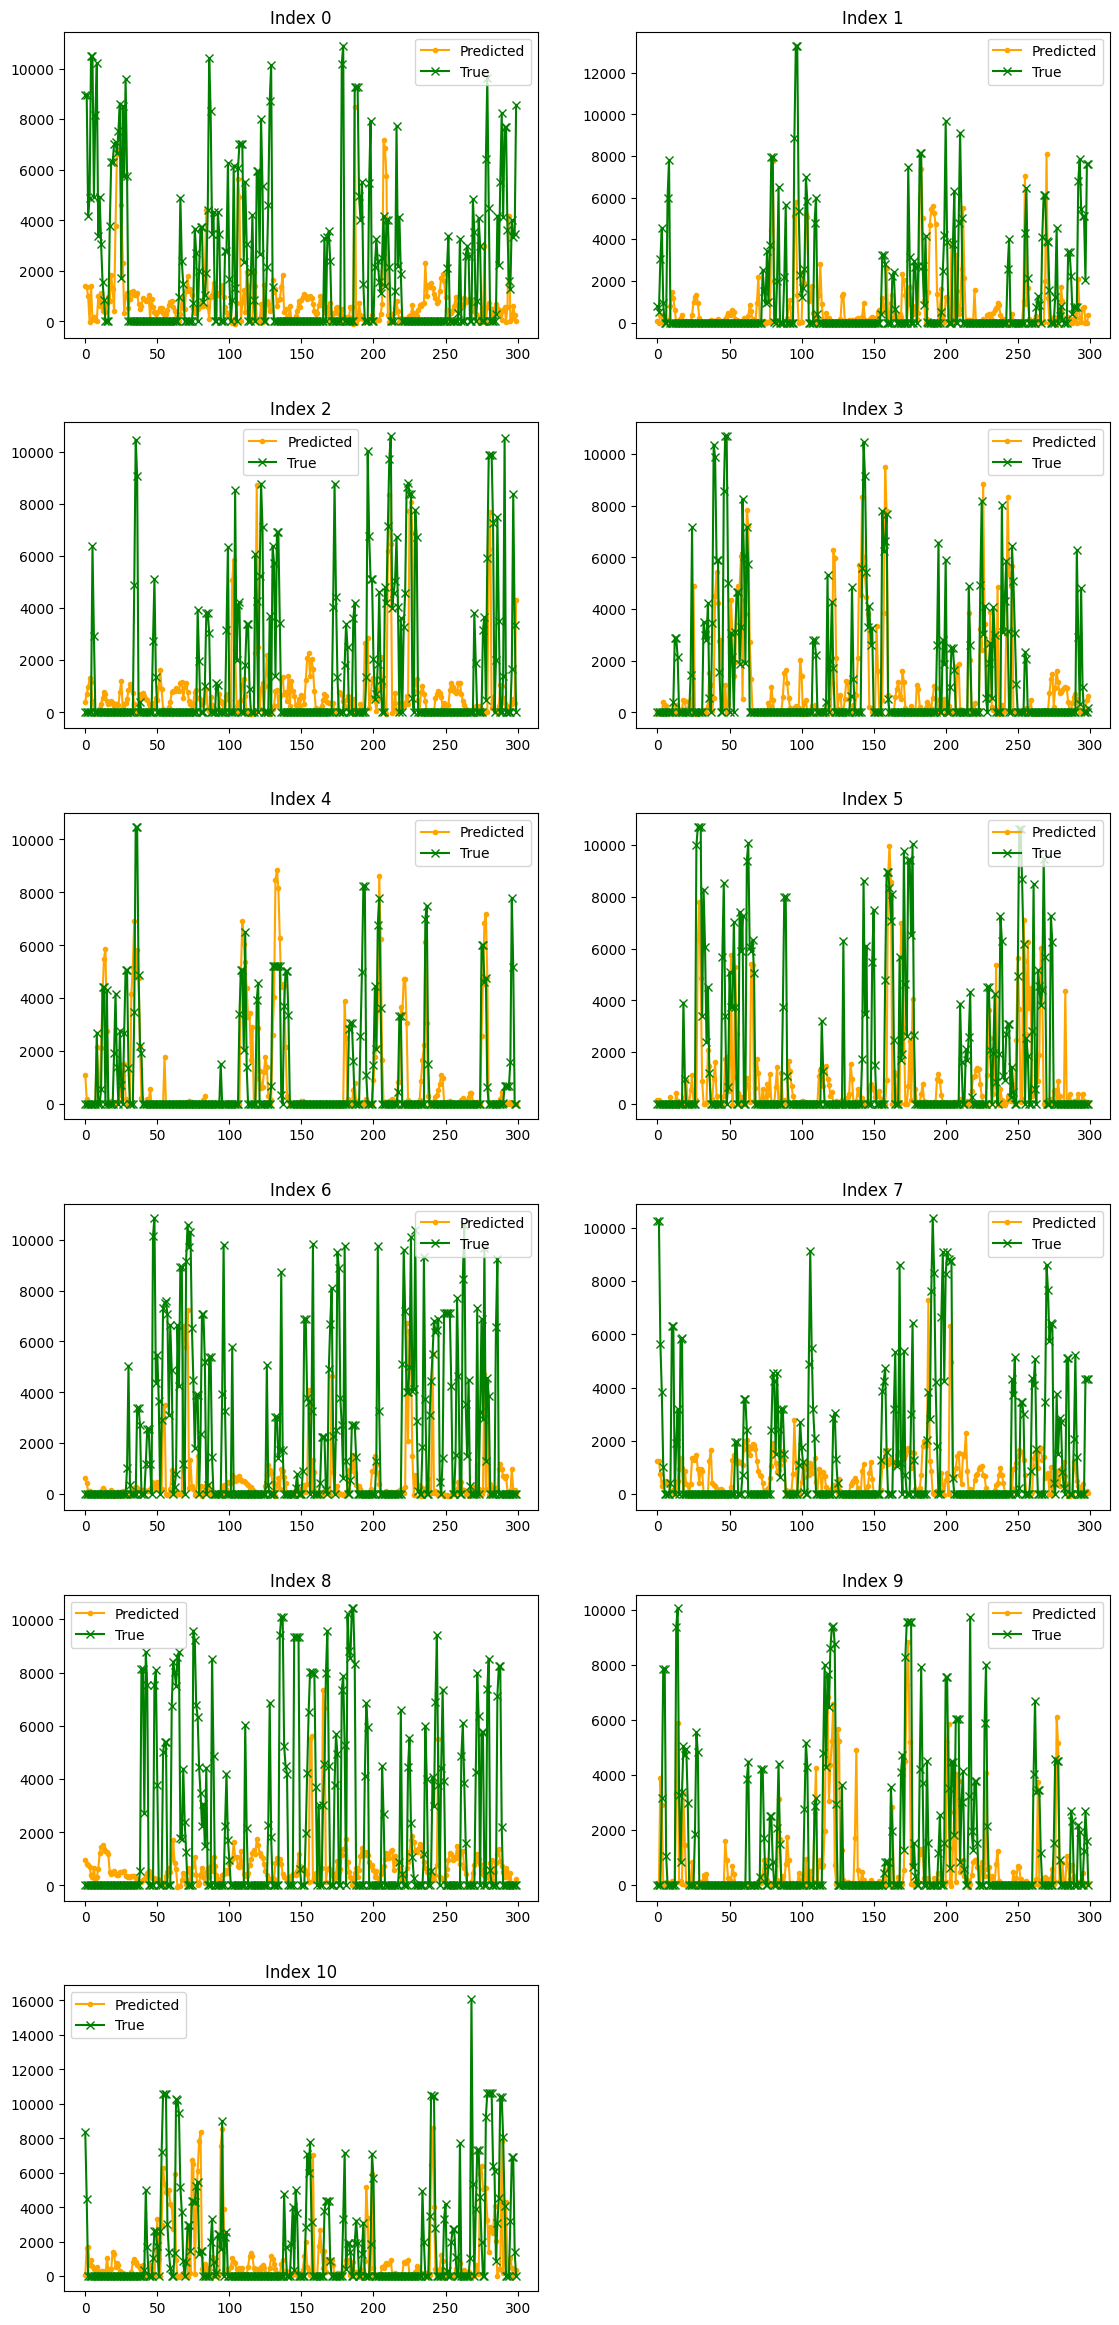

In [22]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
fig.tight_layout(pad=4.0)   

    
for i in range(11):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    # Asumiendo que cada array tiene la misma longitud y queremos graficar todos los valores
    array_length = len(data['pred_E_shifted'][i][0])
    ax.plot(range(array_length), data['pred_E_shifted'][i][0], label='Predicted', marker='.', color='orange')
    ax.plot(range(array_length), data['true_E_shifted'][i][0], label='True', marker='x', color='green')
    ax.set_title(f'Index {i}')
    ax.legend()

# Si el número total de subplots no es un múltiplo exacto de n_cols, ocultamos los subplots adicionales
if n_rows * n_cols > 11:
    for j in range(i+1, n_rows * n_cols):
        row = j // n_cols
        col = j % n_cols
        axes[row, col].axis('off')

plt.show()

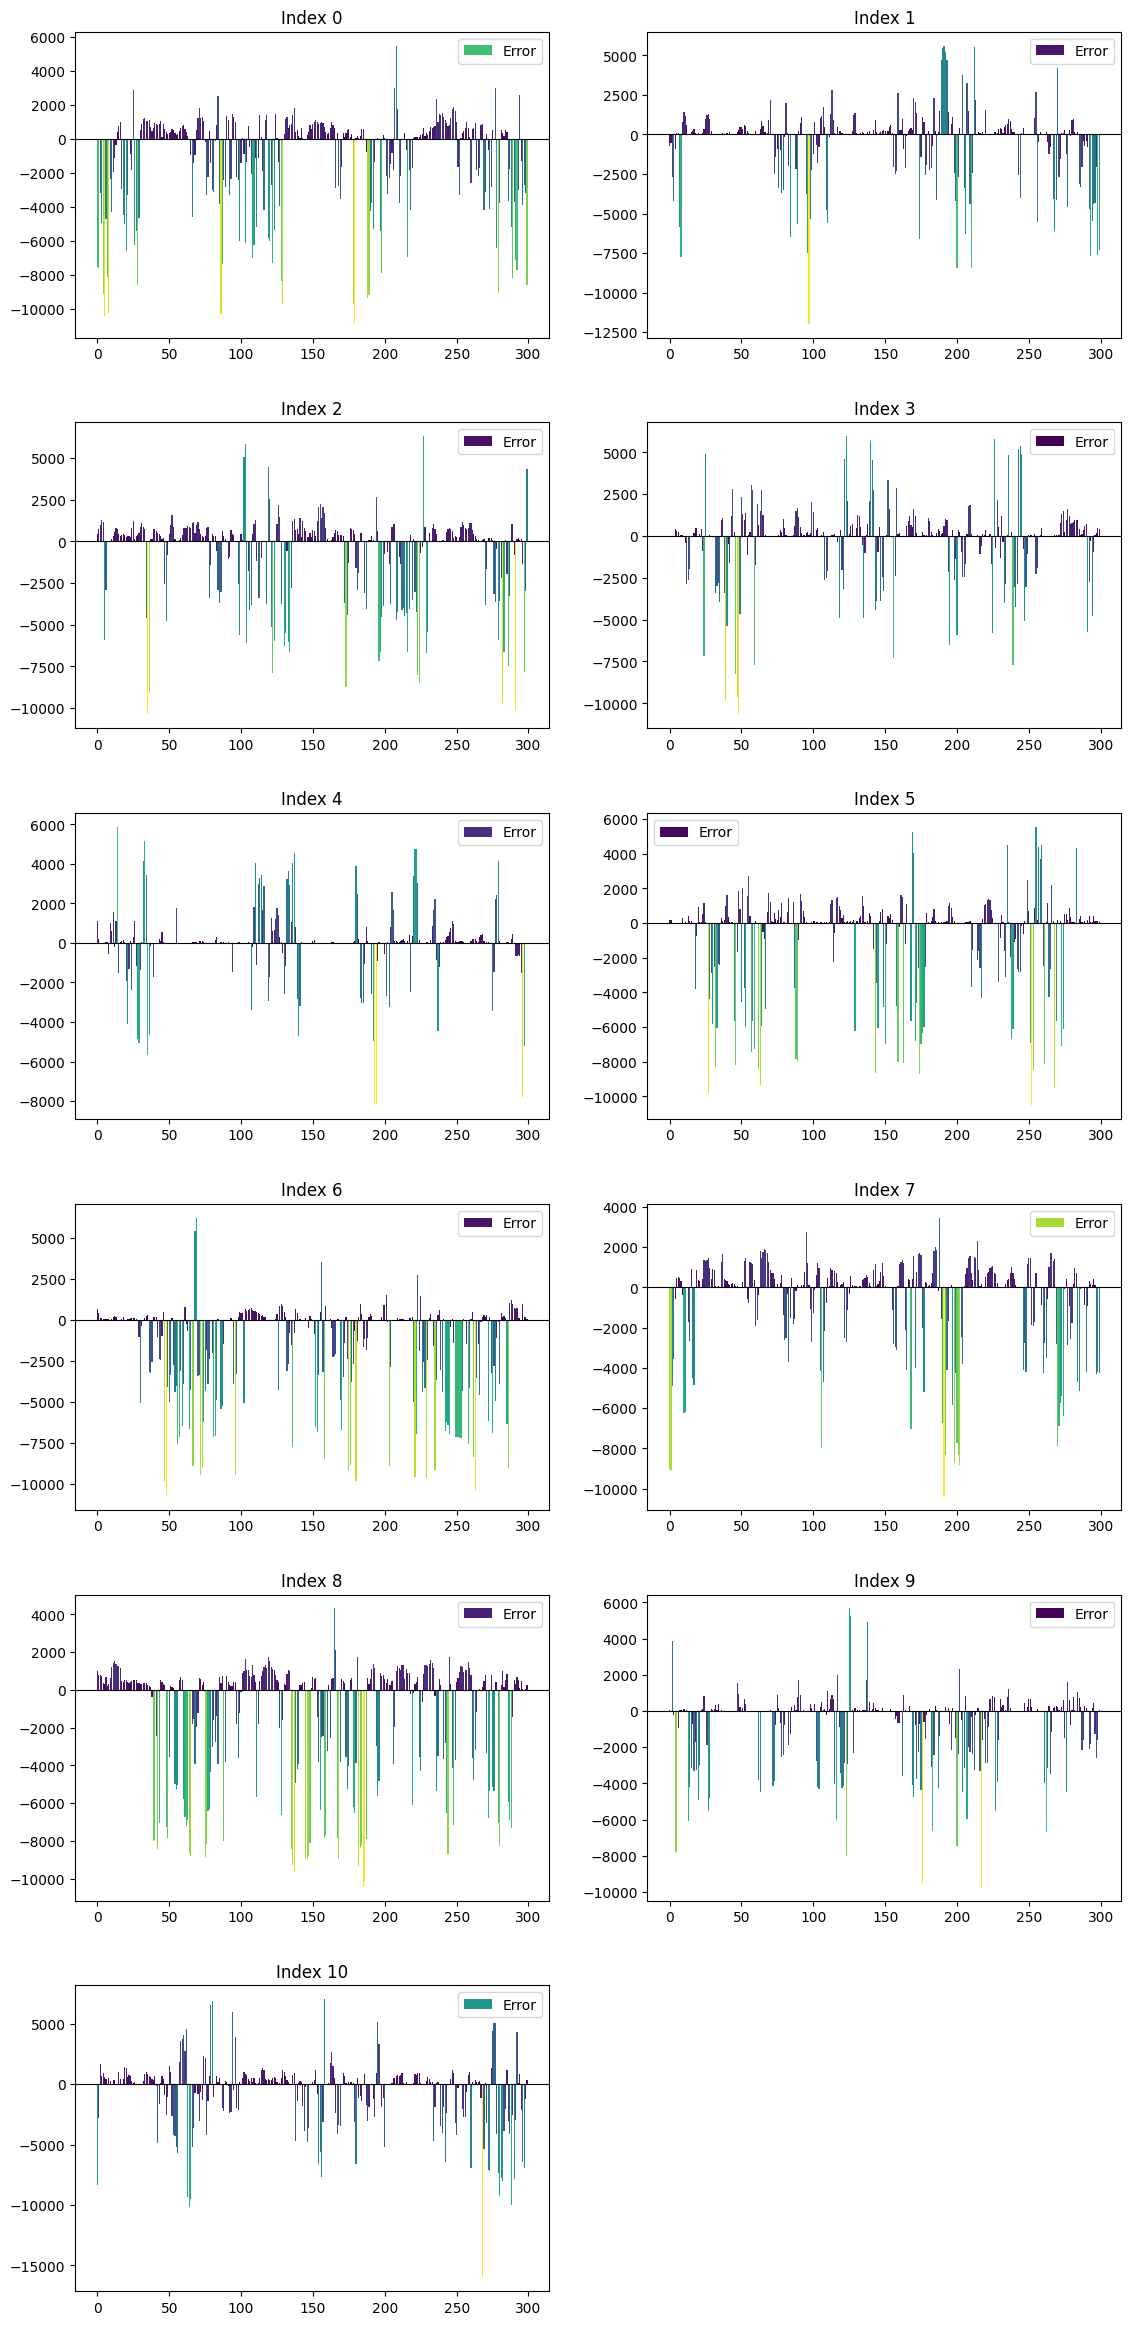

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
fig.tight_layout(pad=4.0)
cmap = plt.get_cmap('viridis')

for i in range(11):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    # Calculando el error
    errors = np.array(data['pred_E_shifted'][i][0]) - np.array(data['true_E_shifted'][i][0])
    
    # Obtener los índices
    indices = range(len(errors))
    
    # Coloreando las barras basadas en el error
    colors = [cmap(abs(error)/max(abs(errors))) for error in errors]
    
    ax.bar(indices, errors, color=colors, label='Error')
    ax.set_title(f'Index {i}')
    ax.axhline(0, color='black', linewidth=0.8)  # Añadir una línea en y=0 para referencia
    ax.legend()

# Si el número total de subplots no es un múltiplo exacto de n_cols, ocultamos los subplots adicionales
if n_rows * n_cols > 11:
    for j in range(i+1, n_rows * n_cols):
        row = j // n_cols
        col = j % n_cols
        axes[row, col].axis('off')

plt.show()


## Distribución de los errores a lo largo de la ventana

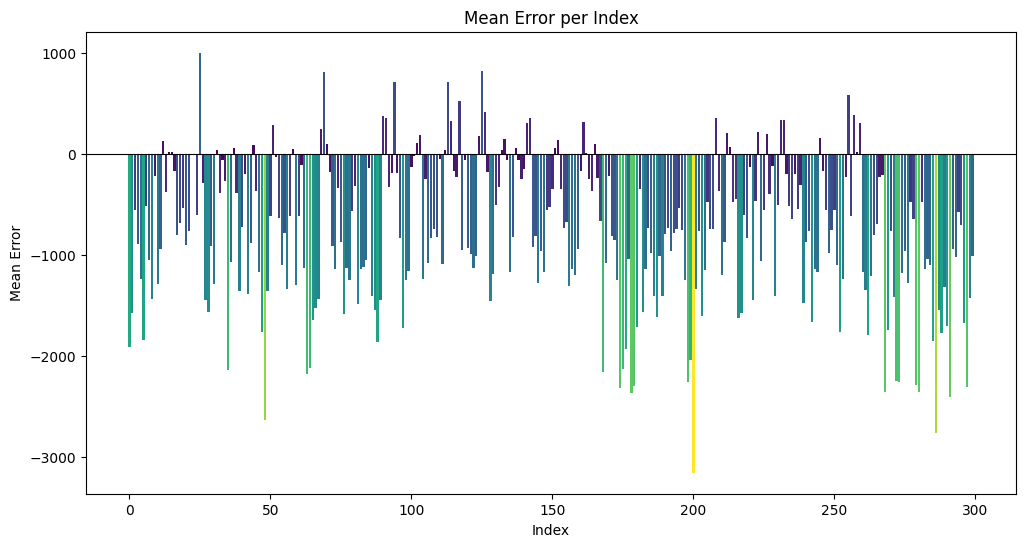

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que data['pred_E_shifted'] y data['true_E_shifted'] tienen estructuras similares
# y contienen listas de numpy arrays para cada instancia

# Calculando el error para cada instancia y cada índice
errors = [np.array(pred[0]) - np.array(true[0]) for pred, true in zip(data['pred_E_shifted'], data['true_E_shifted'])]

# Calculando la media del error por índice
# Primero aseguramos que todos los arrays de error tienen la misma longitud
min_length = min(map(len, errors))  # Encontrando la longitud mínima por si acaso
errors_trimmed = [e[:min_length] for e in errors]  # Recortando para igualar longitudes
mean_errors = np.mean(errors_trimmed, axis=0)

# Graficando la media de errores
fig, ax = plt.subplots(figsize=(12, 6))
indices = np.arange(len(mean_errors))
cmap = plt.get_cmap('viridis')
colors = cmap(np.abs(mean_errors)/np.max(np.abs(mean_errors)))

ax.bar(indices, mean_errors, color=colors)
ax.set_title('Mean Error per Index')
ax.set_xlabel('Index')
ax.set_ylabel('Mean Error')
ax.axhline(0, color='black', linewidth=0.8)  # Línea en y=0 para referencia

plt.show()


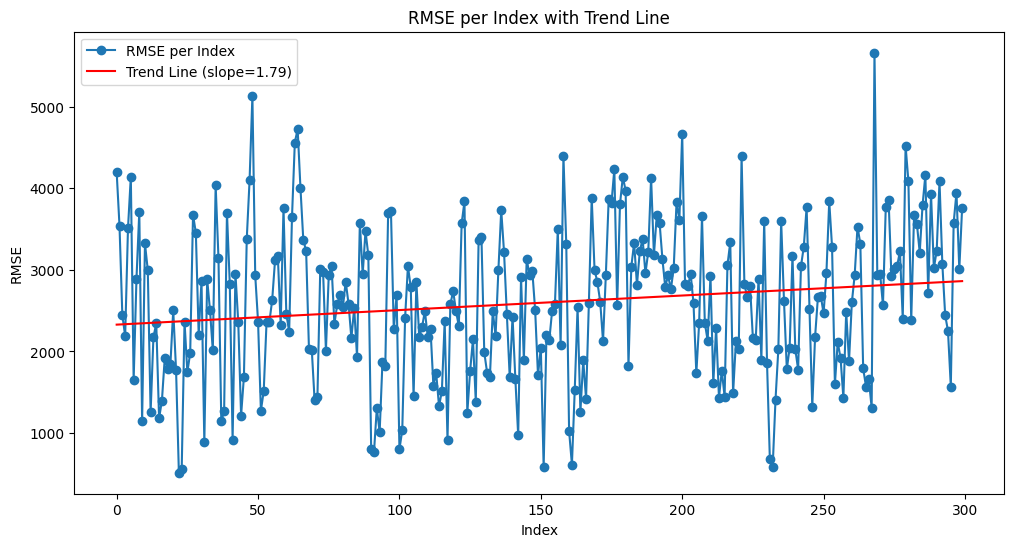

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

# Suponiendo que data['pred_E_shifted'] y data['true_E_shifted'] tienen estructuras similares
# y contienen listas de numpy arrays para cada instancia

# Calcular el RMSE para cada instancia y cada índice
rmse_per_instance = [np.sqrt(mean_squared_error(true[0], pred[0])) for pred, true in zip(data['pred_E_shifted'], data['true_E_shifted'])]

# Asumiendo que cada 'true' y 'pred' tienen la misma longitud, calcular el RMSE por índice
errors_squared = [(np.array(pred[0]) - np.array(true[0]))**2 for pred, true in zip(data['pred_E_shifted'], data['true_E_shifted'])]

# Igualando las longitudes
min_length = min(map(len, errors_squared))
errors_squared_trimmed = [e[:min_length] for e in errors_squared]

# Calculando el RMSE por índice
mean_errors_squared = np.mean(errors_squared_trimmed, axis=0)
rmse_per_index = np.sqrt(mean_errors_squared)

# Graficando el RMSE por índice
fig, ax = plt.subplots(figsize=(12, 6))
indices = np.arange(len(rmse_per_index))
ax.plot(indices, rmse_per_index, label='RMSE per Index', marker='o')

# Añadiendo una línea de tendencia
slope, intercept, r_value, p_value, std_err = stats.linregress(indices, rmse_per_index)
line = slope * indices + intercept
ax.plot(indices, line, 'r', label=f'Trend Line (slope={slope:.2f})')

ax.set_title('RMSE per Index with Trend Line')
ax.set_xlabel('Index')
ax.set_ylabel('RMSE')
ax.legend()

plt.show()
